In [ ]:
!pip install opencv-python

In [ ]:
!pip install gdown

In [ ]:
!pip install matplotlib

In [12]:
%pip install google.colab

ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import gdown

In [2]:
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

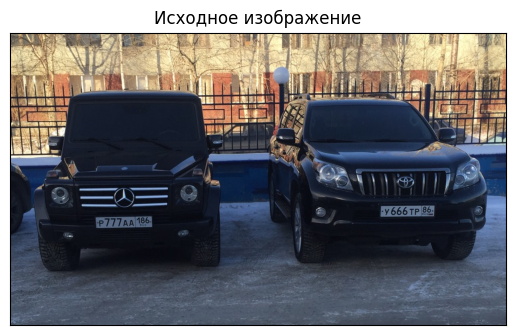

In [3]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/number_2_car.jpg', None, quiet=True)

# Загрузка изображения
img_bgr = cv2.imread('./number_2_car.jpg')

# Изображения в OpenCV загружаются в формате BGR, а для отображения стоит менять на RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# показать загруженное изображение
pyplot.imshow(img_rgb)
pyplot.title('Исходное изображение'),
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()


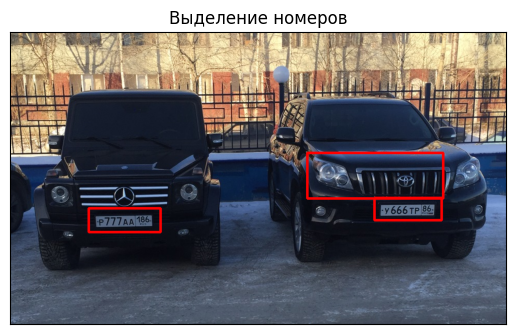

In [4]:
# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
# Выполнение распознавания объектов
bboxes = classifier.detectMultiScale(img_rgb)
# формирование прямоугольника вокруг каждого обнаруженного объекта

for box in bboxes:
    # формирование координат
    x, у, width, height = box
    x2, y2 = x + width, у + height
    # рисование прямоугольников
    cv2.rectangle(img_rgb, (x, у), (x2, y2), (255, 0, 0), 3)

# показать изображение с выделенными номерами
pyplot.imshow(img_rgb)
pyplot.title('Выделение номеров'),
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

In [11]:
%pip install easyocr


  Using cached pyyaml-6.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 8.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 4.7 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 6.2 MB/s eta 0:00:00:00:010:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 9.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 5.7 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 8.7 MB/s eta 0:00:00:00:0100:01
   ━━

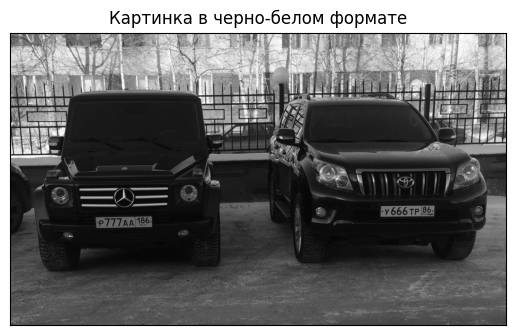

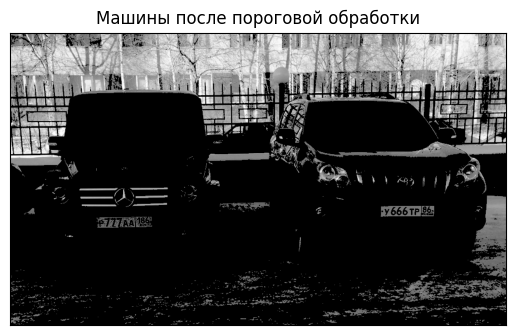

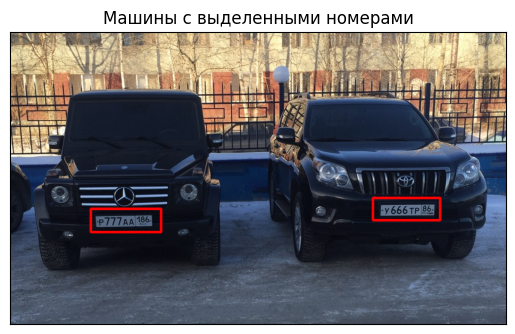

In [5]:
import cv2
import easyocr
import string



chars = set('0123456789') # создадим множество цифр для отсечения "мусорных" текстов

image = cv2.imread("./number_2_car.jpg", cv2.IMREAD_UNCHANGED)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # преобразовать изображение в черно-белое


# показать изображение
pyplot.imshow(image_gray, 'gray')
pyplot.title('Картинка в черно-белом формате'),
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

threshold = cv2.threshold(image_gray, 100, 200, cv2.THRESH_TOZERO)[1] # пороговая обработка для выделения контуров

car_number = [] # Список номеров автомобилей
car_number_image = [] # Список изображений с вырезанными номерами автомобилей

# показать обработанные изображения
pyplot.imshow(threshold, 'gray')
pyplot.title('Машины после пороговой обработки'),
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
# Выполнение распознавания объектов
bboxes = classifier.detectMultiScale(threshold)
# формирование прямоугольника вокруг каждого обнаруженного объекта

for box in bboxes:
    # формирование координат
    border = 3
    x, у, width, height = box
    x2, y2 = x + width, у + height
    # рисование прямоугольников
    cv2.rectangle(image, (x, у), (x2, y2), (0, 0, 255), 3)

    img = image[у+3:y2-3, x+3:x2-3] # получим этот контур из исходного изображения, уберем рамку

    #Вырезанные номера автомобилей
    car_number_image.append(img)

# показать обработанные изображения
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
pyplot.title('Машины с выделенными номерами'),
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()


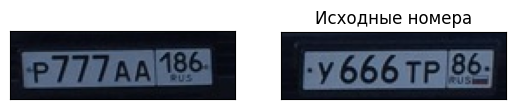

In [6]:
# показать обработанные изображения

fig, ax = pyplot.subplots(1, len(car_number_image))

for i, img in enumerate(car_number_image):
  ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax[i].xaxis.set_ticks([])
  ax[i].yaxis.set_ticks([])
pyplot.title('Исходные номера'),

pyplot.show()

In [7]:
# Пытаемся распознать
reader = easyocr.Reader(['en'])
# Задаем справочник допустимых сиволов в номерах, упрощаем задачу для EasyOCR
ALLOW_STRING = 'HMABTCXOPEKY0123456789xopky'


for i, img in enumerate(car_number_image):
    # Запускаем распознавание, можно и на CPU, процесс быстрый
    result = reader.readtext(img, detail=0, paragraph=True, allowlist=ALLOW_STRING)[0] # преобразуем его в текст
    result = ''.join(result)
    if len(result) > 7 and any((c in chars) for c in result):
        # отсекая "мусорные" варианты, выведем распознанный номер в консоль
        car_number.append(result)

print()
print(f'Распознанные номера: {car_number}')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Распознанные номера: ['P7T7AA186', 'Y666TPBE']


dilation = cv2.dilate(img, kernel)
erosion = cv2.erode(img, kernel)

In [8]:
car_number

['P7T7AA186', 'Y666TPBE']

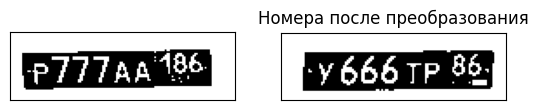

In [9]:
import numpy as np

new_car_number = []

fig, ax = pyplot.subplots(1, len(car_number_image))
for i, img in enumerate(car_number_image):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  contrast2 = cv2.convertScaleAbs(img, alpha=3, beta=10) # параметр alpha - коэффициент контрастности, beta - смещение яркости
  threshold = cv2.threshold(contrast2, 180, 200, cv2.THRESH_BINARY_INV)[1] # пороговая обработка для выделения контуров

  dilation = cv2.dilate(threshold, np.ones((3,3), np.uint8)) # дилатацию проводим с единичной матрицей

  erosion = cv2.erode(dilation, np.ones((2,2), np.uint8)) # размытие проводим с единичной матрицей

  new_car_number.append(threshold)
  ax[i].imshow(threshold, 'gray')
  ax[i].xaxis.set_ticks([])
  ax[i].yaxis.set_ticks([])
pyplot.title('Номера после преобразования'),

pyplot.show()

In [10]:
for img in new_car_number:
    result = reader.readtext(img, detail=0, paragraph=False, allowlist=ALLOW_STRING)[0] # преобразуем его в текст
    print(result)

P777AA186
Y666TP86


In [11]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image
import time
import cv2
import gdown
# Каскад Хаара для машин
gdown.download('https://storage.yandexcloud.net/academy.ai/haarcascade_cars.xml', None, quiet=True)


def cascad_play(name, sleep = 1/30):
    gdown.download(f'https://storage.yandexcloud.net/academy.ai/{name}', None, quiet=True)
    cap = cv2.VideoCapture(f'./{name}') # активация камеры
    car_cascade = cv2.CascadeClassifier('./haarcascade_cars.xml') # загрузка классификатора
    # цикл обработки кадров
    while cap.isOpened:
        ret, frames = cap.read() # читаем кадры из видео

        if not ret:
            break
        gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY) # оттенки серого

        # обнаруживаем автомобили
        cars = car_cascade.detectMultiScale(gray, 1.1, 1)
        # Нарисуем прямоугольник в найденном авто

        for (х, у, w, h) in cars:
            cv2.rectangle(frames, (х, у), (х + w, у + h), (0, 0, 255), 2)

        # Очищаем область вывода
        clear_output(wait=True)
        cv2_imshow(frames) # Отображаем фрейм
        #Задержка перед обновлением фрейма
        time.sleep(sleep)


ModuleNotFoundError: No module named 'google.colab'